In [1]:
import pandas as pd

In [4]:
# Define the file path
file_path = "../Data_Set/new_df_without_outliers_copy_smote_resampled_noNormalised.csv"

In [6]:
# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [10]:
df.head()
#df.describe() 

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
0,80.0,0,1,25.19,6.6,140,0.131757,-0.128959,0
1,54.0,0,0,27.32,6.6,80,-0.797024,-0.128959,0
2,28.0,0,0,27.32,5.7,158,0.131757,0.160772,0
3,36.0,0,0,23.45,5.0,155,0.165669,-0.128959,0
4,76.0,1,1,20.14,4.8,155,0.165669,0.160772,0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('diabetes', axis=1), df['diabetes'], test_size=0.2, random_state=42)

In [22]:
#this code is training a random forest regression model 
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [24]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.07826191236774617
R-squared: 0.6869522453482106


Doing Feature Importance: 

Purpose: 
Identify key drivers: It helps pinpoint which features have the most significant influence on the model's predictions



In [25]:
import matplotlib.pyplot as plt

In [26]:
# Get feature importances
feature_importances = model.feature_importances_

# Get feature names
feature_names = list(df.drop('diabetes', axis=1).columns)

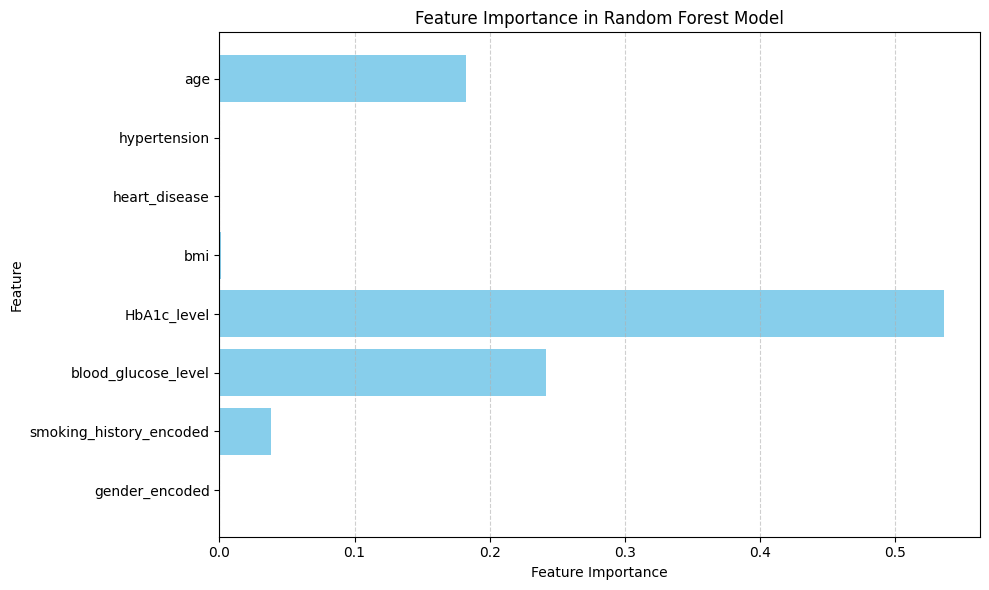

In [27]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()  # Arrange features with highest importance on top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [31]:
correlation_matrix = df.corr()

correlation_matrix

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
age,1.000000,0.183488,0.173889,0.312751,0.276847,0.244339,0.335575,0.004808,0.492172
hypertension,0.183488,1.000000,0.066995,0.074591,0.041921,0.042074,0.095969,0.000764,0.072408
heart_disease,0.173889,0.066995,1.000000,0.016544,0.026735,0.020323,0.057677,0.068562,0.046054
bmi,0.312751,0.074591,0.016544,1.000000,0.200837,0.173537,0.251095,-0.006502,0.352016
HbA1c_level,0.276847,0.041921,0.026735,0.200837,1.000000,0.273657,0.155903,0.047375,0.575665
blood_glucose_level,0.244339,0.042074,0.020323,0.173537,0.273657,1.000000,0.120721,0.044813,0.475938
smoking_history_encoded,0.335575,0.095969,0.057677,0.251095,0.155903,0.120721,1.000000,0.029031,0.277097
gender_encoded,0.004808,0.000764,0.068562,-0.006502,0.047375,0.044813,0.029031,1.000000,0.077795
diabetes,0.492172,0.072408,0.046054,0.352016,0.575665,0.475938,0.277097,0.077795,1.000000


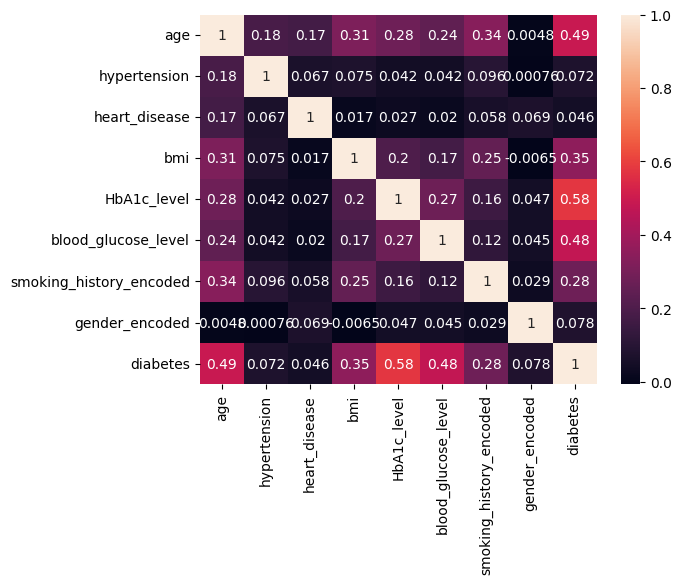

In [33]:
import seaborn as sns

sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [39]:
#the features with most importance is HbA1c, blood_glucose_level, and age 

#making a dataframe with those values only 

import pandas as pd

# Assuming your data is loaded into a pandas DataFrame named 'data'

# List of features you want to select (replace with your actual feature names)
selected_features = ['HbA1c_level', 'blood_glucose_level', 'age','diabetes']

# Create a new DataFrame with only the selected features
df_selected_with_diabetes = df[selected_features]

df_selected_with_diabetes

,HbA1c_level,blood_glucose_level,age,diabetes
0,6.600000,140,80.0,0
1,6.600000,80,54.0,0
2,5.700000,158,28.0,0
3,5.000000,155,36.0,0
4,4.800000,155,76.0,0
...,...,...,...,...
181139,6.949298,126,80.0,1
181140,5.800000,155,80.0,1
181141,6.995535,159,35.0,1
181142,6.017092,155,58.0,1


Supervised Learning Task such as prediction


Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [89]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_selected_with_diabetes[['HbA1c_level', 'blood_glucose_level', 'age']], df_selected_with_diabetes['diabetes'], test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model (replace with desired evaluation metric)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

#evaluate the model using f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("Logistic Regression F1 Score:", f1)

#evaluate the model using precision score
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Logistic Regression Precision Score:", precision)

#evaluate the model using recall score
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("Logistic Regression Recall Score:", recall)

Logistic Regression Accuracy: 0.8557785199701896
Logistic Regression F1 Score: 0.857470198314193
Logistic Regression Precision Score: 0.8470493128536782
Logistic Regression Recall Score: 0.8681506849315068


Visual Representation of Logistic Regression

Visual Representation 1: Scatterplot with Decision Boundary

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

Logistic Regression Accuracy: 0.8557785199701896
Logistic Regression Precision: 0.8470493128536782
Logistic Regression Recall: 0.8681506849315068
Logistic Regression F1 Score: 0.857470198314193


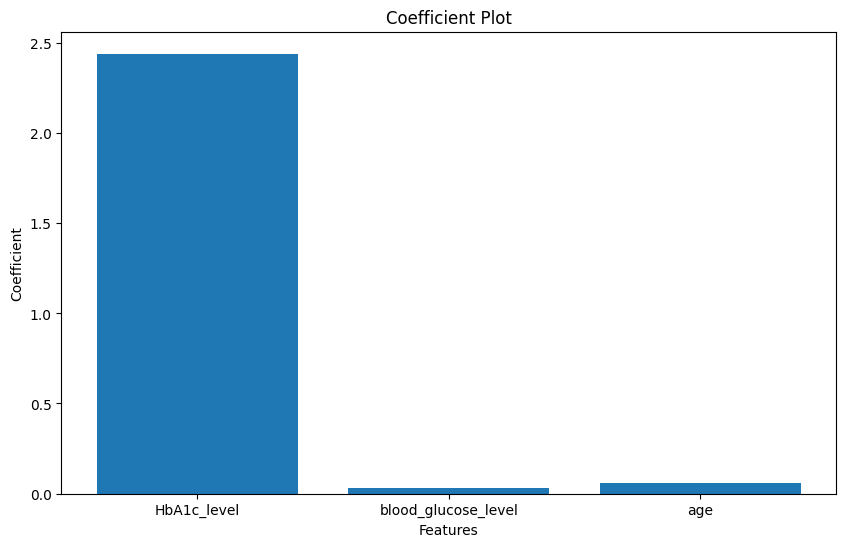

In [91]:
# Split data into features and target variable
X = df_selected_with_diabetes[['HbA1c_level', 'blood_glucose_level', 'age']]
y = df_selected_with_diabetes['diabetes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

#evaluating the regression model using accuracy score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

#evaluating the regression model using precision 
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Logistic Regression Precision:", precision)

#evaluating the regression model using recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("Logistic Regression Recall:", recall)

#evaluating the regression model using F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("Logistic Regression F1 Score:", f1)

# Plot coefficient plot
plt.figure(figsize=(10, 6))
plt.bar(X.columns, model.coef_[0])
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Coefficient Plot')
plt.show()

Positive Coefficients: A positive coefficient for a feature (e.g., HbA1c level) indicates that an increase in that feature's value is associated with an increased likelihood of diabetes. For example, if the coefficient for HbA1c level is positive, higher HbA1c levels are associated with a higher probability of diabetes.

Visual Representation 2: ROC Curve

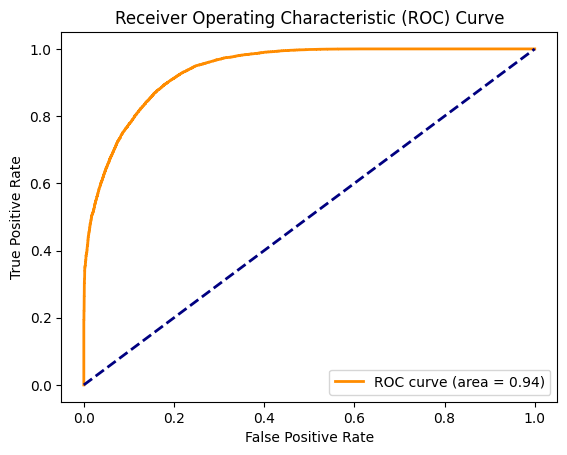

In [92]:
# Plot ROC curve
y_scores = model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

ROC(Receiver Operating Characteristic) Curve is a graphical representation of the performance of a binary classification model across different threshold values

The area under the ROC curve (AUC) is a measure of the model's ability to distinguish between the positive and negative classes.

An ROC curve area of 0.94 indicates that the model has a high discriminatory power

In Layman terms: Results ranges from 0-1. The closer to 1 the better. 

Understanding the Results in the diabetes Context: 
With an ROC curve area of 0.94, your model is doing exceptionally well. It means it's very good at correctly identifying people with diabetes and those without it. So, if you use this model to predict whether someone has diabetes based on their data, it's likely to be quite accurate.

Decision Tree Prediction

In [93]:
from sklearn.tree import DecisionTreeClassifier

# Split data into training and testing sets (same as logistic regression)
X_train, X_test, y_train, y_test = train_test_split(df_selected_with_diabetes[['HbA1c_level', 'blood_glucose_level', 'age']], df_selected_with_diabetes['diabetes'], test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

#evaluating the model using precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Decision Tree Precision:", precision)

#evaluating the model using recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("Decision Tree Recall:", recall)

#evaluating the model using F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("Decision Tree F1 Score:", f1)

Decision Tree Accuracy: 0.9745783764387645
Decision Tree Precision: 0.9864673574542778
Decision Tree Recall: 0.9623287671232876
Decision Tree F1 Score: 0.9742485670348106


Visual representation of decision tree prediction

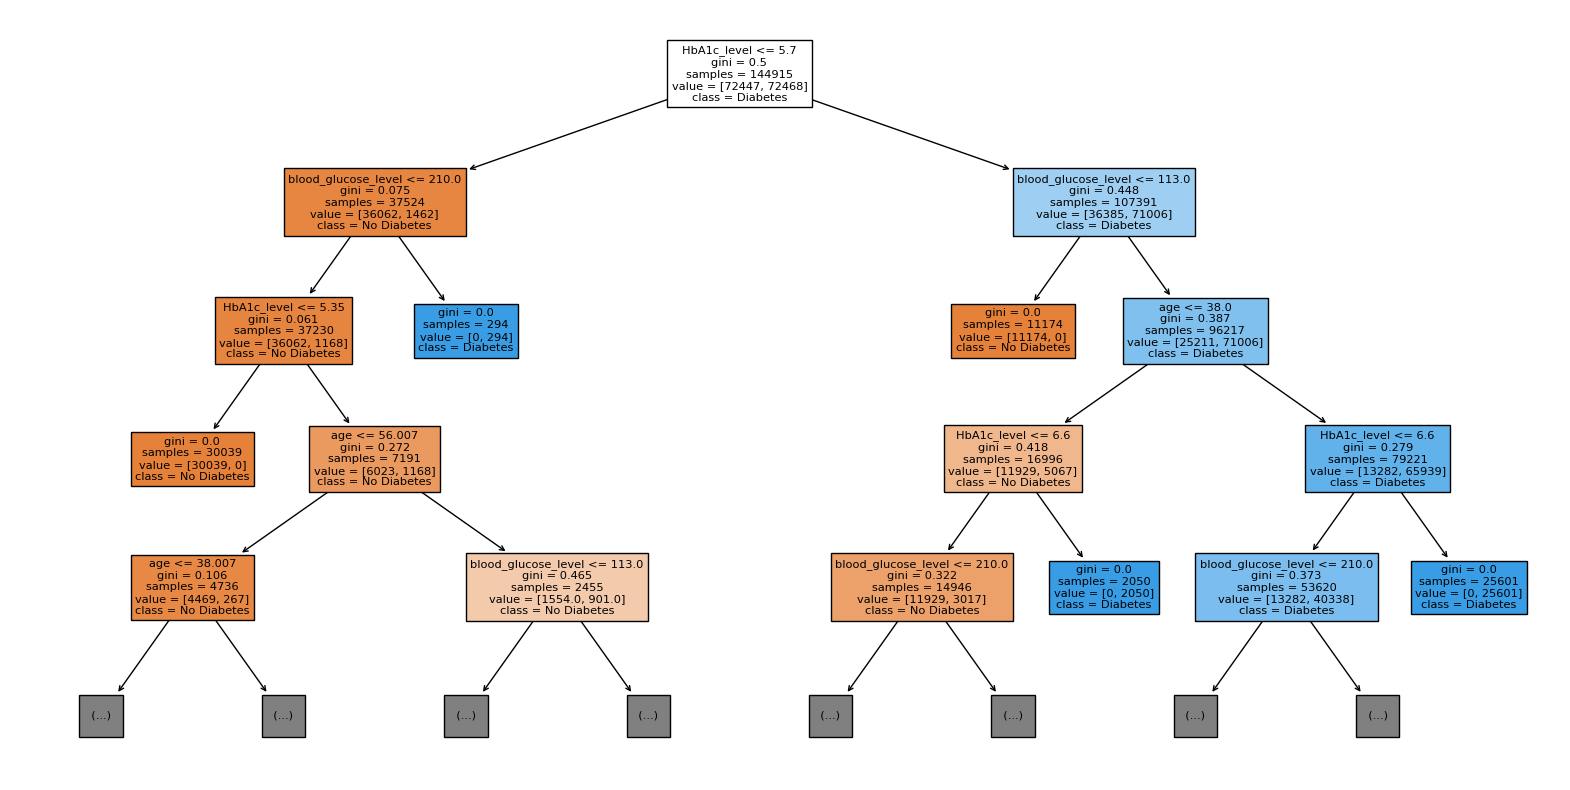

In [94]:
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=df_selected_with_diabetes.columns[:-1], class_names=['No Diabetes', 'Diabetes'],
max_depth=4)
plt.show()

Applying Random Forest Prediction

In [95]:
df_selected_with_diabetes

,HbA1c_level,blood_glucose_level,age,diabetes
0,6.600000,140,80.0,0
1,6.600000,80,54.0,0
2,5.700000,158,28.0,0
3,5.000000,155,36.0,0
4,4.800000,155,76.0,0
...,...,...,...,...
181139,6.949298,126,80.0,1
181140,5.800000,155,80.0,1
181141,6.995535,159,35.0,1
181142,6.017092,155,58.0,1


In [96]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np 


In [97]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [98]:
# Assuming you have a dataset df containing your features and target variable
X_rf = df_selected_with_diabetes.drop(columns=['diabetes'])  # Features
y_rf= df['diabetes']  # Target variable

# Split the dataset into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
model.fit(X_train_rf, y_train_rf)

RandomForestRegressor(random_state=42)

In [100]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_rf = model.predict(X_test_rf)

mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

Mean Squared Error: 0.020647645428479234
R-squared: 0.9174093905364933


In [101]:
predictions_rf = model.predict(X_test_rf)